In [14]:
import numpy as np
from matplotlib import pyplot as plt
import time
from math import sin, radians, cos
%matplotlib inline

In [3]:
def step(state, dt, box_bound):
    xy_new = state[ :2] + state[2: ] * dt + np.random.randn(2)
    while(True):
        if xy_new[0] < box_bound[0]:
            x_over = abs(box_bound[0] - xy_new[0])
            xy_new[0] = box_bound[0] + x_over
            state[2] *= -1
        elif xy_new[0] > box_bound[1]:
            x_over = abs(box_bound[1] - xy_new[0])
            xy_new[0] = box_bound[1] - x_over
            state[2] *= -1
        elif xy_new[1] < box_bound[2]:
            y_over = abs(box_bound[2] - xy_new[1])
            xy_new[1] = box_bound[2] + y_over
            state[3] *= -1
        elif xy_new[1] > box_bound[3]:
            y_over = abs(box_bound[3] - xy_new[1])
            xy_new[1] = box_bound[3] - y_over
            state[3] *= -1
        else: 
            state[:2] = xy_new
            break
    
    return state

In [157]:
def compute_hidden(velocity):
    if velocity[0] > 0 and velocity[1] > 0:
        return 0
    if velocity[0] > 0 and velocity[1] < 0:
        return 1
    if velocity[0] < 0 and velocity[1] < 0:
        return 2
    if velocity[0] < 0 and velocity[1] > 0:
        return 3

def transition(A, old_hidden, new_hidden):
    A[old_hidden, new_hidden] += 1
    return A
    

In [158]:
T = 200
dt = 1
x0 = 100*np.random.random()
y0 = 100*np.random.random()
vx = np.random.random()
vy = (1 - vx**2)**0.5
u  = 4 
init_state = np.array([x0, y0, u * vx,  u * vy])
# init_state = np.array([0,0,0.2,-0.1])

In [159]:
def generate_data(T, dt, init_state):
    A = np.zeros((4,4))
    STATE = np.zeros((T+1, 4))
    box_bound = np.array([0, 100, 0, 100])

    # plot = figure(plot_width=300, plot_height=300)
    # plot.x_range = Range1d(box_bound[0], box_bound[1])
    # plot.y_range = Range1d(box_bound[2], box_bound[3])

    # c = plot.circle(x=[init_state[0]], y=[init_state[1]])
    # target = show(plot, notebook_handle=True)
    state = init_state
    STATE[0] = state
#     old_hidden = init_hidden(init_state[2:])
    for i in range(T):
        state = step(state, dt, box_bound)
#         print(state[2:])
        STATE[i+1] = state
        if i == 0:
            old_hidden = compute_hidden(state[2:])
        new_hidden = compute_hidden(state[2:])
        A = transition(A, old_hidden, new_hidden)
        old_hidden = new_hidden
        # c.data_source.data['x'] = [state[0]]
        # c.data_source.data['y'] = [state[1]]
        # push_notebook(handle=target)
        # time.sleep(0.2)
    Y = (STATE[1:] - STATE[:T])[:, :2]
    A = (A.T / A.sum(1)).T
    return Y, STATE, A

In [160]:
Y, Z, A = generate_data(T, dt, init_state)

In [190]:
tvx = np.concatenate([np.arange(T)[:,None], Y[:,0][:,None]], axis=1)
tvy = np.concatenate([np.arange(T)[:,None], Y[:,1][:,None]], axis=1)

vx_seg = np.concatenate([tvx[:-1, None], tvx[1:, None]], axis=1)
vy_seg = np.concatenate([tvy[:-1, None], tvy[1:, None]], axis=1)

Text(0,0.5,'Δy')

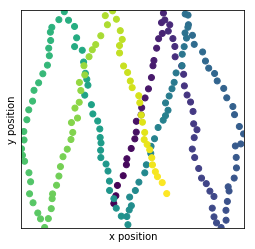

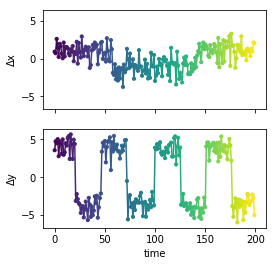

In [198]:
import matplotlib.gridspec as gridspec
from matplotlib.collections import LineCollection

gs = gridspec.GridSpec(2,2)
fig1 = plt.figure(figsize=(4,4))
ax1 = fig1.gca()

ax1.scatter(Z[:,0],Z[:,1],c=np.arange(T+1))
ax1.set_xlim([0,100])
ax1.set_ylim([0,100])
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_ylabel('y position')
ax1.set_xlabel('x position')


fig2, (ax2, ax3) = plt.subplots(2, 1, sharex=True, sharey=True, figsize=(4, 4))

dx_lc = LineCollection(vx_seg)
dx_lc.set_array(np.arange(T-1))
ax2.add_collection(dx_lc)
ax2.scatter(np.arange(T), Y[:,0], c=np.arange(T), s=10)
#ax2.set_xlabel('t')
ax2.set_ylabel('Δx')

dy_lc = LineCollection(vy_seg)
dy_lc.set_array(np.arange(T-1))
ax3.add_collection(dy_lc)
ax3.scatter(np.arange(T), Y[:,1], c=np.arange(T), s=10)
ax3.set_xlabel('time')
ax3.set_ylabel('Δy')

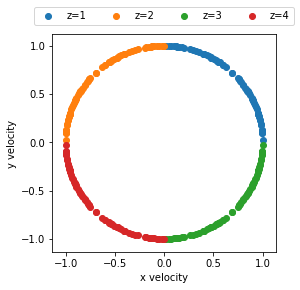

In [247]:
v = np.random.random((100,2))
v_norm = ((v**2).sum(1))**0.5
v = v / v_norm[:, None]
v = v[v_norm < 1]
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
ax.scatter(v[:,0], v[:,1], label='z=1')
ax.scatter(-v[:,0], v[:,1], label='z=2')
ax.scatter(v[:,0], -v[:,1], label='z=3')
ax.scatter(-v[:,0], -v[:,1], label='z=4')
ax.set_xlabel('x velocity')
ax.set_ylabel('y velocity')
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)


array([0.4035308 , 0.25079679, 0.44919793, 0.988872  , 1.07843176,
       0.05734473, 0.58096877, 0.73714977, 0.64867314, 0.85888238,
       0.3268811 , 1.17898147, 0.3959536 , 0.97347216, 0.52690649,
       1.05922587, 0.73967106, 0.22450357, 0.95843746, 0.96095015,
       0.30531729, 0.52835145, 0.30973057, 0.61989592, 1.30755648,
       0.77025602, 0.74528251, 0.43629539, 0.5195621 , 0.65770058,
       0.19142439, 0.51423189, 0.3328837 , 1.15668984, 0.28876953,
       1.13045893, 0.97325582, 0.59573454, 0.75969155, 0.12791032,
       1.15387385, 0.7532878 , 0.34392127, 0.62004087, 0.9296055 ,
       1.03389679, 0.21567164, 0.96346768, 1.05013694, 0.67214275,
       0.09930382, 0.61659793, 0.77711513, 0.72453102, 0.74963391,
       0.39103391, 0.32509616, 1.18256607, 1.0266602 , 1.06979974,
       0.66078527, 0.62445654, 1.04607125, 0.968364  , 0.37478663,
       0.55027337, 0.97796849, 0.45941122, 0.45173091, 0.85350387,
       0.29740961, 0.28884029, 0.52758067, 0.61189307, 1.00024